# 01. TensorFlow Lite를 활용한 AI 모델 배포

## 01-1. TensorFlow 개요

### TensorFlow란?
TensorFlow는 Google이 개발한 오픈소스 머신러닝 프레임워크로, 다양한 머신러닝 및 딥러닝 모델을 쉽게 구축하고 배포할 수 있도록 설계되었습니다. 강력한 연산 성능과 풍부한 라이브러리 생태계를 갖추고 있어 다양한 플랫폼에서 사용할 수 있습니다.

### TensorFlow의 특징
- **유연한 아키텍처**: 딥러닝 모델을 쉽게 구축하고 확장 가능
- **GPU 및 TPU 지원**: 강력한 연산 가속 기능 제공
- **풍부한 커뮤니티 지원**: 오픈소스로 개발되며 다양한 리소스 활용 가능
- **다양한 응용 분야**: 이미지 인식, 자연어 처리, 시계열 분석 등 다양한 머신러닝 작업에 활용

### Tensor(텐서)란?
딥러닝에서는 데이터를 처리하기 위해 **텐서(Tensor)** 라는 기본 데이터 구조를 사용합니다. Tensor는 다차원 배열을 의미하며, TensorFlow에서 데이터를 표현하는 핵심 요소입니다.

#### Tensor의 주요 개념
- **Rank (차원)**: Tensor의 차원을 의미하며, 0차원(스칼라)부터 N차원까지 가능
- **Shape (형태)**: 각 차원의 크기를 나타내는 리스트
- **Data Type (데이터 타입)**: Tensor 내부 데이터의 타입 (float32, int32 등)

TensorFlow는 기본적으로 **텐서를 기반으로 수학적 연산을 수행**하며, 다양한 연산 함수(`tf.add()`, `tf.matmul()`, `tf.reduce_sum()`, `tf.nn.softmax()` 등)를 제공합니다.

#### Tensor 예제

In [1]:
import tensorflow as tf

# 0D Tensor (Scalar)
tensor_0d = tf.constant(5)

# 1D Tensor (Vector)
tensor_1d = tf.constant([1, 2, 3])

# 2D Tensor (Matrix)
tensor_2d = tf.constant([[1, 2], [3, 4]])

# 3D Tensor
tensor_3d = tf.constant([[[1], [2]], [[3], [4]]])

print("0D Tensor:", tensor_0d)
print("1D Tensor:", tensor_1d)
print("2D Tensor:", tensor_2d)
print("3D Tensor:", tensor_3d)

2025-02-12 08:38:21.804454: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-12 08:38:21.935179: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739317101.984128    5685 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739317101.999910    5685 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-12 08:38:22.132873: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

0D Tensor: tf.Tensor(5, shape=(), dtype=int32)
1D Tensor: tf.Tensor([1 2 3], shape=(3,), dtype=int32)
2D Tensor: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
3D Tensor: tf.Tensor(
[[[1]
  [2]]

 [[3]
  [4]]], shape=(2, 2, 1), dtype=int32)


I0000 00:00:1739317104.521775    5685 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5686 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


## 01-2. TensorFlow Lite 개요
TensorFlow는 기본적으로 대규모 데이터를 처리하고 강력한 딥러닝 모델을 구축하는 데 유용하지만, 경량화된 모델을 필요로 하는 모바일 및 IoT 장치에서는 높은 연산 성능 요구로 인해 실행이 어렵습니다. 이를 해결하기 위해 등장한 것이 **TensorFlow Lite(TFLite)** 입니다.

### TensorFlow Lite란?
TensorFlow Lite(TFLite)는 모바일 및 임베디드 디바이스에서 머신러닝 모델을 효율적으로 실행할 수 있도록 설계된 경량화된 프레임워크입니다. 기존 TensorFlow 모델을 변환하여 메모리 사용량을 줄이고 실행 속도를 최적화할 수 있습니다.

### TensorFlow Lite의 특징
- **경량화 모델**: 낮은 연산 성능을 가진 장치에서도 실행 가능
- **빠른 실행 속도**: 최적화된 커널을 사용하여 연산 속도를 향상
- **다양한 플랫폼 지원**: Android, iOS, Raspberry Pi 등에서 실행 가능
- **최적화된 모델 변환 지원**: 양자화(Quantization) 및 프루닝(Pruning) 적용 가능

## 01-3. Pre-trained 모델을 변환하여 활용하기
TFLite를 활용하여 사전 학습된 모델을 변환하고 Raspberry Pi에서 실행할 수 있습니다.

### 모델 변환 과정
1. TensorFlow에서 학습된 모델(.h5, .pb)을 준비
2. TFLite Converter를 사용하여 `.tflite` 파일로 변환
3. Raspberry Pi에서 TensorFlow Lite 인터프리터를 활용하여 모델 실행

# 02. [실습 4] TensorFlow Lite 모델 실행하기

## 02-1. TFLite MobileNet 모델을 다운로드하고 변환
**MobileNet**은 경량화된 CNN 기반 이미지 분류 모델로, 제한된 컴퓨팅 성능에서도 빠르게 실행됩니다.

### MobileNet TFLite 변환 과정
1. TensorFlow Hub에서 MobileNet 모델 다운로드
2. TensorFlow Lite Converter를 사용하여 `.tflite` 파일 변환
3. 변환된 모델을 Raspberry Pi로 전송

In [1]:
import tensorflow as tf

# Pre-trained 모델 로드
model = tf.keras.applications.MobileNetV2(weights='imagenet')

# TFLite Converter 적용
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# 변환된 모델 저장
with open('mobilenet_v2.tflite', 'wb') as f:
    f.write(tflite_model)

2025-02-11 16:12:24.815646: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-11 16:12:24.929015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739257944.975507   21990 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739257944.990315   21990 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-11 16:12:25.096773: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

INFO:tensorflow:Assets written to: /tmp/tmpgdynshoh/assets


INFO:tensorflow:Assets written to: /tmp/tmpgdynshoh/assets


Saved artifact at '/tmp/tmpgdynshoh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1000), dtype=tf.float32, name=None)
Captures:
  139628164167136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139628164392112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139628164394224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139628164387536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139628164389824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139628164397744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139628164547328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139628164546976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139628164397040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139628164549088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13962816439

W0000 00:00:1739257952.538383   21990 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1739257952.538399   21990 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-02-11 16:12:32.538884: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpgdynshoh
2025-02-11 16:12:32.544454: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-02-11 16:12:32.544471: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpgdynshoh
I0000 00:00:1739257952.610525   21990 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2025-02-11 16:12:32.623054: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-02-11 16:12:33.099735: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpgdynshoh
2025-02-11 16:12:33.208923: I tensorflow/cc/saved_model/loader.cc:466] SavedModel 

## 02-2. 이미지 입력 및 객체 분류 결과 출력
### Imagenet 레이블 데이터 다운로드
#### 1. Kaggle ImageNet label 페이지에 접속
https://www.kaggle.com/datasets/tusonggao/imagenet-labels?resource=download# 

#### 2. Kaggle에 로그인
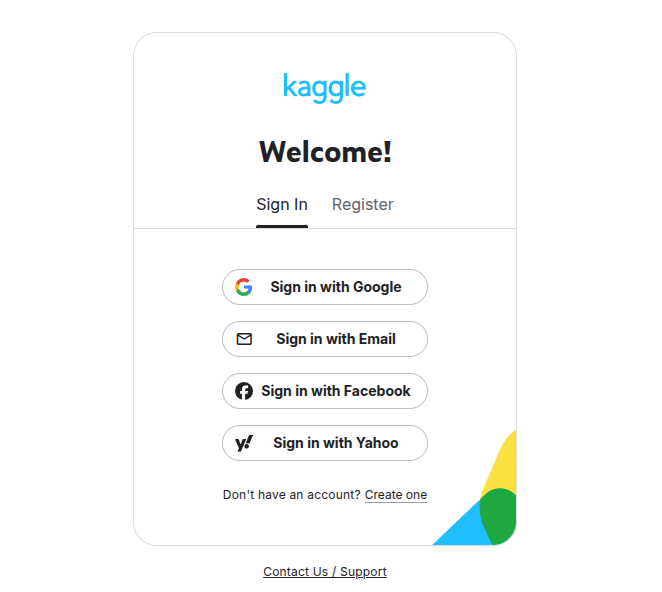

#### 3. Download 클릭
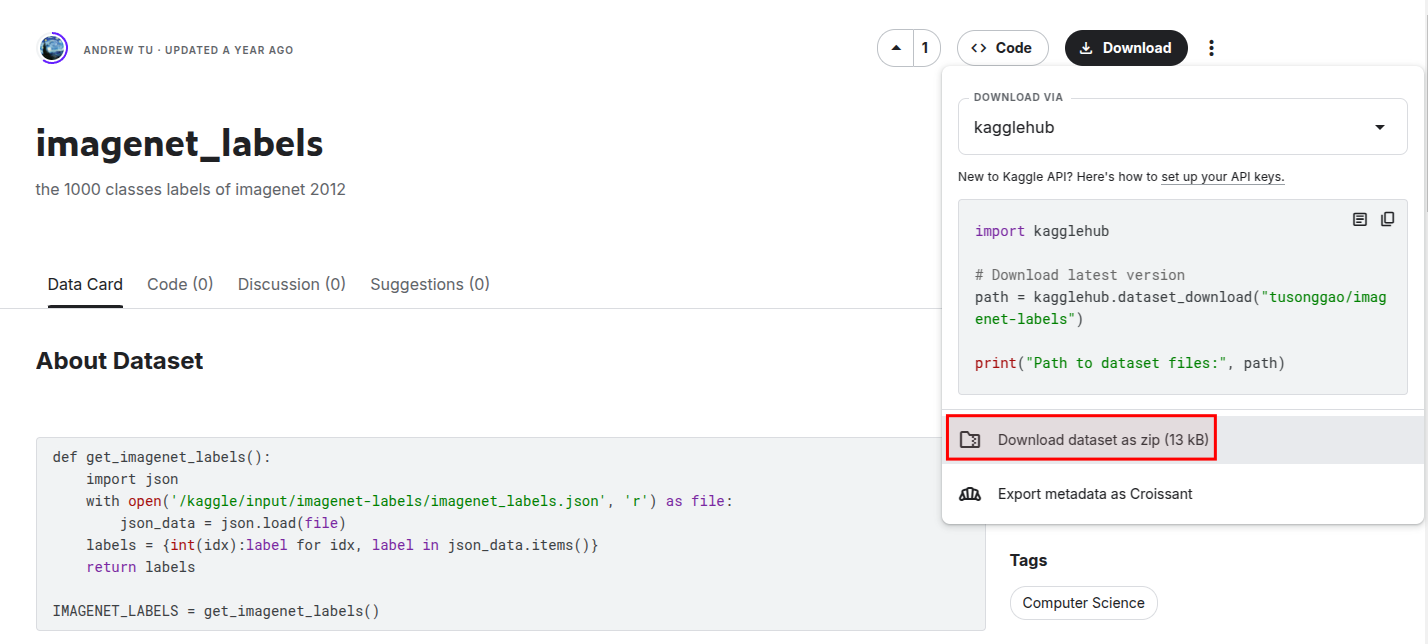

Imagenet 레이블을 zip파일로 다운로드합니다.

#### 프로젝트 폴더에 압출 풀기

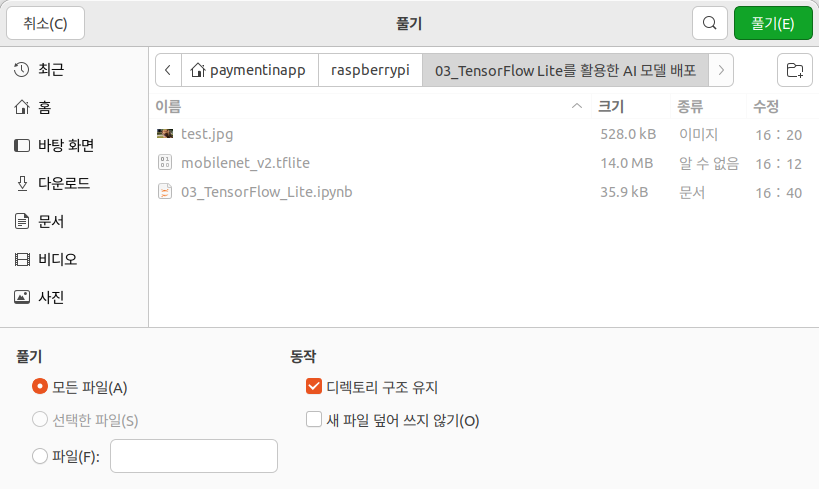

### 이미지 분류 테스트 코드
변환된 TFLite 모델을 사용하여 이미지를 입력하고 객체를 분류합니다.

In [3]:
import tensorflow.lite as tflite
import numpy as np
from PIL import Image
import json

# JSON 파일 로드
with open("./imagenet_labels.json", "r") as f:
    labels = json.load(f)

# TFLite 모델 로드
interpreter = tflite.Interpreter(model_path="mobilenet_v2.tflite")
interpreter.allocate_tensors()

# 입력 및 출력 텐서 정보 가져오기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 이미지 전처리 및 입력 (RGB 변환 포함)
image = Image.open("test.jpg").convert("RGB").resize((224, 224))
input_data = np.array(image, dtype=np.float32) / 255.0  # Normalize to [0,1]
input_data = np.expand_dims(input_data, axis=0)  # (224, 224, 3) -> (1, 224, 224, 3)

# 입력 텐서 설정 및 실행
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# 예측 결과 가져오기
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_index = np.argmax(output_data)  # 가장 높은 확률을 가진 인덱스

# 인덱스를 통해 라벨 가져오기
predicted_label = labels.get(str(predicted_index), "Unknown")  # JSON은 키가 문자열 형태

# 결과 출력
print(f"Prediction: {predicted_label} (Index: {predicted_index})")


Prediction: Chesapeake Bay retriever (Index: 209)


## 02-3. Raspberry Pi에서 MobileNet 속도 테스트
TFLite 모델이 Raspberry Pi에서 얼마나 빠르게 실행되는지 테스트합니다.

In [ ]:
import time
start_time = time.time()
interpreter.invoke()
end_time = time.time()
print(f"Execution Time: {end_time - start_time:.4f} seconds")

# 03. 실시간 객체 탐지 개념

### 객체 탐지 모델의 원리 및 활용 방법
- 객체 탐지(Object Detection)는 이미지에서 여러 객체를 찾아 분류하는 기술입니다.
- 두 가지 대표적인 기법:
  - **Bounding Box 기반 탐지** (YOLO, SSD 등)
  - **Segmentation 기반 탐지** (Mask R-CNN 등)

### MobileNet SSD vs YOLO 비교
| 모델 | 정확도 | 속도 | 경량화 |
|---|---|---|---|
| MobileNet SSD | 보통 | 빠름 | 높음 |
| YOLO | 높음 | 보통 | 중간 |

MobileNet SSD는 Raspberry Pi 같은 경량 장치에서 적합하며, YOLO는 높은 정확도가 필요한 경우 적합합니다.

# 04. [실습 5] 실시간 객체 탐지 모델 적용

## 04-1. COCO Dataset 기반 MobileNet SSD 모델 실행
MobileNet SSD를 활용하여 COCO 데이터셋 기반 객체 탐지를 실행합니다.

#### SSD MobileNet 다운로드
```bash
wget https://storage.googleapis.com/download.tensorflow.org/models/tflite/coco_ssd_mobilenet_v1_1.0_quant_2018_06_29.zip
unzip coco_ssd_mobilenet_v1_1.0_quant_2018_06_29.zip
rm coco_ssd_mobilenet_v1_1.0_quant_2018_06_29.zip 
```

#### SSD MobileNet 실행
현재 다운로드 받은 COCO 데이터셋에 Unknonw 라벨이 섞여 있기 때문에 직접 클래스 리스트를 추가합니다.

In [18]:
import cv2
import numpy as np
import tflite_runtime.interpreter as tflite

# COCO 클래스 리스트
LABELS = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train",
    "truck", "boat", "traffic light", "fire hydrant", "street sign", "stop sign", "parking meter",
    "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
    "hat", "backpack", "umbrella", "shoe", "eye glasses", "handbag", "tie", "suitcase", "frisbee",
    "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard",
    "surfboard", "tennis racket", "bottle", "plate", "wine glass", "cup", "fork", "knife", "spoon",
    "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza",
    "donut", "cake", "chair", "couch", "potted plant", "bed", "mirror", "dining table", "window",
    "desk", "toilet", "door", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone",
    "microwave", "oven", "toaster", "sink", "refrigerator", "blender", "book", "clock", "vase",
    "scissors", "teddy bear", "hair drier", "toothbrush"
]

# TFLite 모델 로드
interpreter = tflite.Interpreter(model_path="detect.tflite")
interpreter.allocate_tensors()

# 모델 입력/출력 정보 가져오기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 카메라 또는 비디오 파일 열기
cap = cv2.VideoCapture(0)  # 0: 웹캠 사용

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 입력 데이터 전처리
    height, width, _ = frame.shape
    input_shape = input_details[0]['shape'][1:3]
    input_data = cv2.resize(frame, (input_shape[1], input_shape[0]))
    input_data = np.expand_dims(input_data, axis=0).astype(np.uint8)

    # 모델 실행
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()

    # 출력 데이터 가져오기
    boxes = interpreter.get_tensor(output_details[0]['index'])[0]  # Bounding Box 좌표
    classes = interpreter.get_tensor(output_details[1]['index'])[0]  # 클래스 ID
    scores = interpreter.get_tensor(output_details[2]['index'])[0]  # 신뢰도 점수

    # 객체 검출 결과 표시
    for i in range(len(scores)):
        if scores[i] > 0.5:  # 신뢰도 50% 이상
            ymin, xmin, ymax, xmax = boxes[i]
            xmin, xmax = int(xmin * width), int(xmax * width)
            ymin, ymax = int(ymin * height), int(ymax * height)
            label = LABELS[int(classes[i])]

            # 바운딩 박스 및 라벨 출력
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            cv2.putText(frame, f"{label}: {scores[i]:.2f}", (xmin, ymin - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # 화면에 표시
    cv2.imshow("MobileNet SSD Object Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## 04-2. 카메라 영상을 실시간으로 분석하고 객체 감지
카메라에서 실시간으로 데이터를 입력받아 객체를 탐지하는 모델을 실행합니다.

## 04-3. 감지된 객체에 따라 특정 액션 실행
객체가 감지되었을 때 Raspberry Pi의 GPIO를 활용하여 특정 액션(LED 점등, 비프음 출력)을 수행할 수 있습니다.

In [ ]:
import RPi.GPIO as GPIO
import time

# LED 및 부저 핀 설정
LED_PIN = 18
BUZZER_PIN = 23
GPIO.setmode(GPIO.BCM)
GPIO.setup(LED_PIN, GPIO.OUT)
GPIO.setup(BUZZER_PIN, GPIO.OUT)

# 객체 감지 시 실행할 동작
if detected_object == 'person':
    GPIO.output(LED_PIN, GPIO.HIGH)
    GPIO.output(BUZZER_PIN, GPIO.HIGH)
    time.sleep(1)
    GPIO.output(LED_PIN, GPIO.LOW)
    GPIO.output(BUZZER_PIN, GPIO.LOW)

GPIO.cleanup()